# Importing Libraries

In [61]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Load Dataset

We start by loading the IBM HR dataset and checking its structure.

In [62]:
path = "data/HR-Employee-Attrition.csv"
df = pd.read_csv(path)

In [63]:
print("1) File loaded from:", path)
print("2) Shape (rows, columns):", df.shape)
print("\n3) Columns and dtypes:")
print(df.dtypes)

1) File loaded from: E:\github\HR-Employee-Attrition.csv
2) Shape (rows, columns): (1470, 35)

3) Columns and dtypes:
Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
Relatio

In [64]:
df = pd.read_csv(path)

print("Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())


Shape: (1470, 35)

First 5 rows:
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction Standard

In [65]:
print("\nMissing values per column:")
print(df.isna().sum())


Missing values per column:
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurre

In [66]:
print("\nAttrition value counts:")
print(df['Attrition'].value_counts())
print("\nAttrition %:")
print((df['Attrition'].value_counts() / len(df) * 100).round(2))


Attrition value counts:
Attrition
No     1233
Yes     237
Name: count, dtype: int64

Attrition %:
Attrition
No     83.88
Yes    16.12
Name: count, dtype: float64


In [67]:
df['Attrition_flag'] = df['Attrition'].map({'Yes':1,'No':0})
corr = df.corr(numeric_only=True)['Attrition_flag'].sort_values(ascending=False)
print("\nTop correlated numeric features with Attrition:")
print(corr.head(15))


Top correlated numeric features with Attrition:
Attrition_flag              1.000000
DistanceFromHome            0.077924
NumCompaniesWorked          0.043494
MonthlyRate                 0.015170
PerformanceRating           0.002889
HourlyRate                 -0.006846
EmployeeNumber             -0.010577
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
Name: Attrition_flag, dtype: float64


# Exploratory Data Analysis

We explore attrition trends by department, job role, age, and income.

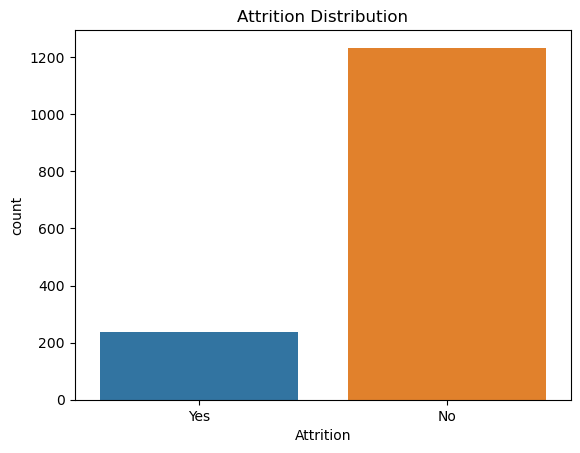

In [68]:
sns.countplot(x="Attrition", data=df)
plt.title("Attrition Distribution")
plt.show()

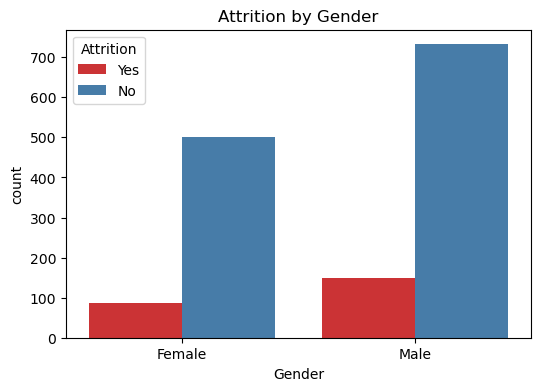

In [69]:
plt.figure(figsize=(6,4))
sns.countplot(x="Gender", hue="Attrition", data=df, palette="Set1")
plt.title("Attrition by Gender")
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_2624\1306951665.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[df['Attrition']=="Yes","Age"], label="Attrition=Yes", shade=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_2624\1306951665.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[df['Attrition']=="No","Age"], label="Attrition=No", shade=True)


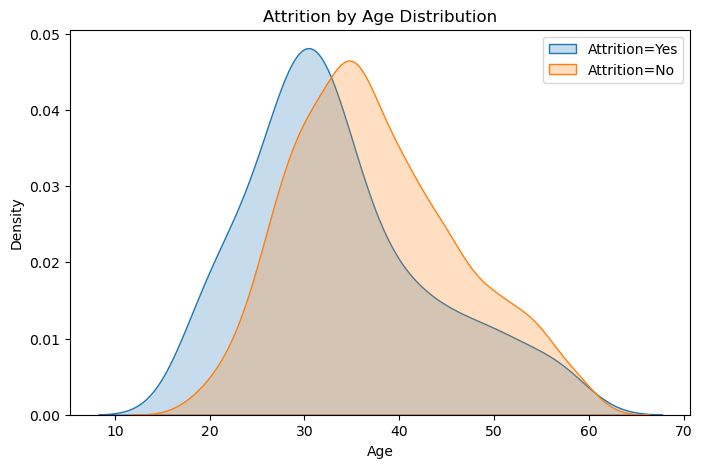

In [70]:
plt.figure(figsize=(8,5))
sns.kdeplot(df.loc[df['Attrition']=="Yes","Age"], label="Attrition=Yes", shade=True)
sns.kdeplot(df.loc[df['Attrition']=="No","Age"], label="Attrition=No", shade=True)
plt.title("Attrition by Age Distribution")
plt.xlabel("Age")
plt.legend()
plt.show()

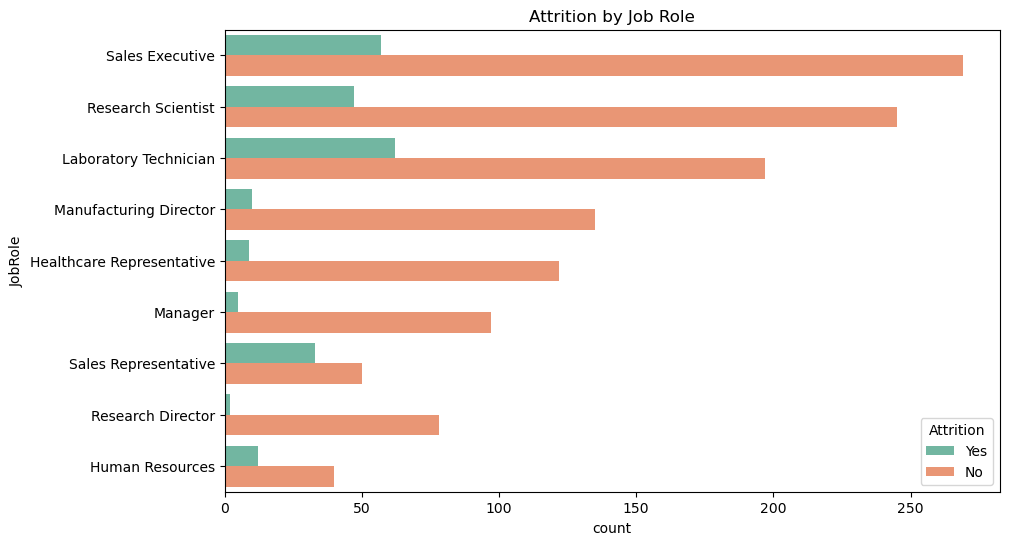

In [71]:
plt.figure(figsize=(10,6))
sns.countplot(y="JobRole", hue="Attrition", data=df, palette="Set2")
plt.title("Attrition by Job Role")
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_2624\3902177071.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[df['Attrition']=="Yes","YearsAtCompany"], label="Attrition=Yes", shade=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_2624\3902177071.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[df['Attrition']=="No","YearsAtCompany"], label="Attrition=No", shade=True)


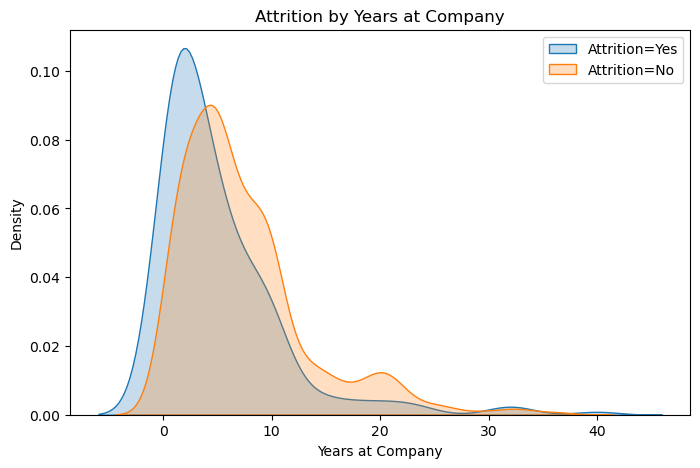

In [72]:
plt.figure(figsize=(8,5))
sns.kdeplot(df.loc[df['Attrition']=="Yes","YearsAtCompany"], label="Attrition=Yes", shade=True)
sns.kdeplot(df.loc[df['Attrition']=="No","YearsAtCompany"], label="Attrition=No", shade=True)
plt.title("Attrition by Years at Company")
plt.xlabel("Years at Company")
plt.legend()
plt.show()


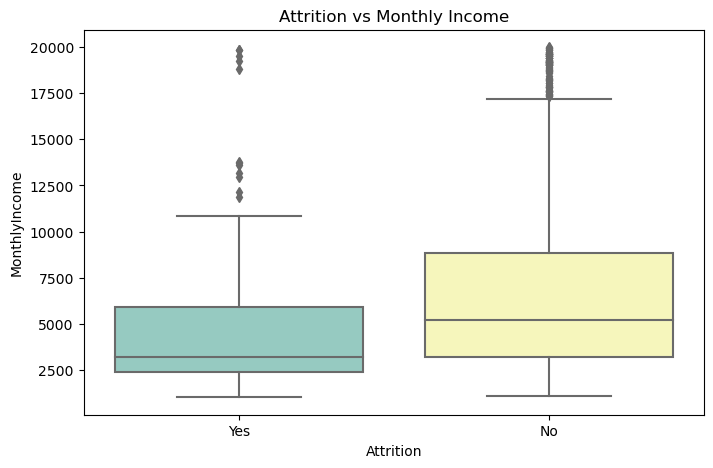

In [73]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Attrition", y="MonthlyIncome", data=df, palette="Set3")
plt.title("Attrition vs Monthly Income")
plt.show()

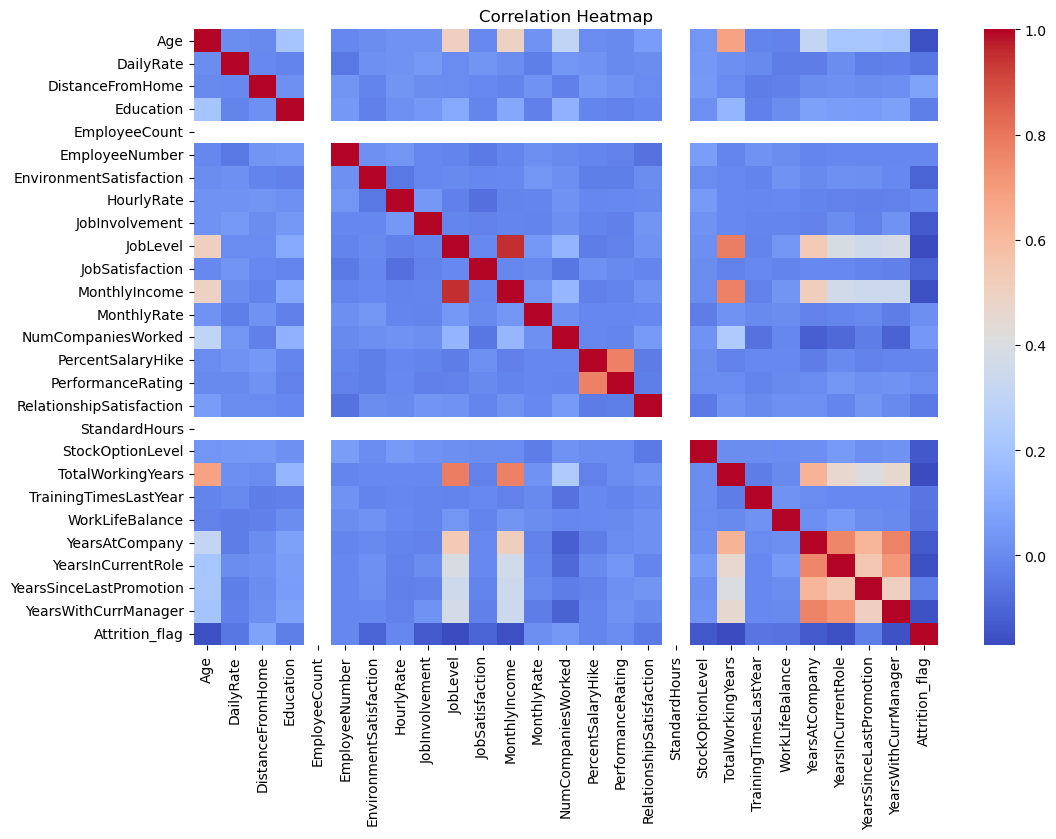

In [74]:
plt.figure(figsize=(12,8))
numeric_cols = df.select_dtypes(include=['int64','float64']).columns
corr = df[numeric_cols].corr()
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

In [75]:
attrition_means = df.groupby("Attrition")[["Age","MonthlyIncome","YearsAtCompany","DistanceFromHome"]].mean()
print("Average metrics by Attrition:")
print(attrition_means)


Average metrics by Attrition:
                 Age  MonthlyIncome  YearsAtCompany  DistanceFromHome
Attrition                                                            
No         37.561233    6832.739659        7.369019          8.915653
Yes        33.607595    4787.092827        5.130802         10.632911


<Figure size 600x400 with 0 Axes>

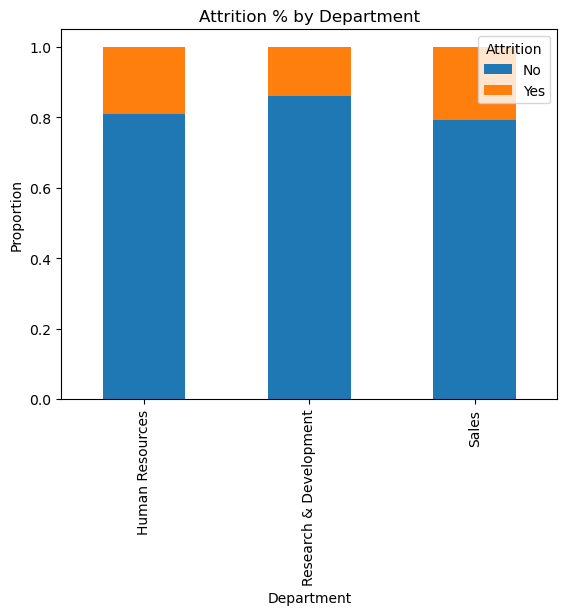

In [76]:
plt.figure(figsize=(6,4))
dept_attrition = df.groupby("Department")["Attrition"].value_counts(normalize=True).unstack()
dept_attrition.plot(kind="bar", stacked=True)
plt.title("Attrition % by Department")
plt.ylabel("Proportion")
plt.show()

In [77]:
y = df['Attrition_flag']
X = df.drop(columns=['Attrition','Attrition_flag','EmployeeCount','EmployeeNumber','Over18','StandardHours'])


# Data Preprocessing

We scale numeric features and encode categorical features using a pipeline.

In [78]:
num_cols = X.select_dtypes(include=['int64','float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
])


# Train/Test Split

In [79]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


# Modeling - Logistic Regression

We train Logistic Regression

In [80]:
log_reg = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LogisticRegression(max_iter=1000, class_weight="balanced"))
])

log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)
y_proba_lr = log_reg.predict_proba(X_test)[:,1]

print("\nLogistic Regression Report:")
print(classification_report(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_lr))



Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.92      0.77      0.84       247
           1       0.35      0.64      0.45        47

    accuracy                           0.75       294
   macro avg       0.63      0.71      0.65       294
weighted avg       0.83      0.75      0.78       294

ROC-AUC: 0.8031699543457662


# Modeling - Random Forest

We train Random Forest

In [81]:
rf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestClassifier(n_estimators=200, class_weight="balanced", random_state=42))
])

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:,1]

print("\nRandom Forest Report:")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_rf))



Random Forest Report:
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       247
           1       0.62      0.11      0.18        47

    accuracy                           0.85       294
   macro avg       0.74      0.55      0.55       294
weighted avg       0.82      0.85      0.80       294

ROC-AUC: 0.7831854595572402


# Modeling - XGBoost with Hyperparameter Tuning

In [84]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [85]:
xgb = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", XGBClassifier(use_label_encoder=False, eval_metric="logloss", scale_pos_weight=len(y[y==0])/len(y[y==1])))
])

In [86]:
param_grid = {
    "model__max_depth": [3, 5, 7],
    "model__n_estimators": [100, 200],
    "model__learning_rate": [0.01, 0.1]
}

In [87]:
grid = GridSearchCV(xgb, param_grid, cv=3, scoring="roc_auc", n_jobs=-1)
grid.fit(X_train, y_train)


E:\anaconda\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:44:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'R...
                                                      max_cat_threshold=None,
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None, ...))]),
             n_jobs=-1,
             param_grid={'model__learning_rate': [0.01, 0.1],
                         'model__max_depth': [3, 5, 7],
                         'model__n_estimators': [100, 200]},
             scoring='roc_auc')

In [88]:
print("Best Params:", grid.best_params_)
print("Best ROC-AUC:", grid.best_score_)


Best Params: {'model__learning_rate': 0.1, 'model__max_depth': 7, 'model__n_estimators': 200}
Best ROC-AUC: 0.7900790995472601


In [89]:
y_pred_xgb = grid.predict(X_test)
y_proba_xgb = grid.predict_proba(X_test)[:,1]

In [90]:
print("\nXGBoost Report:")
print(classification_report(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_xgb))


XGBoost Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       247
           1       0.58      0.32      0.41        47

    accuracy                           0.85       294
   macro avg       0.73      0.64      0.66       294
weighted avg       0.83      0.85      0.84       294

ROC-AUC: 0.7744853131191317


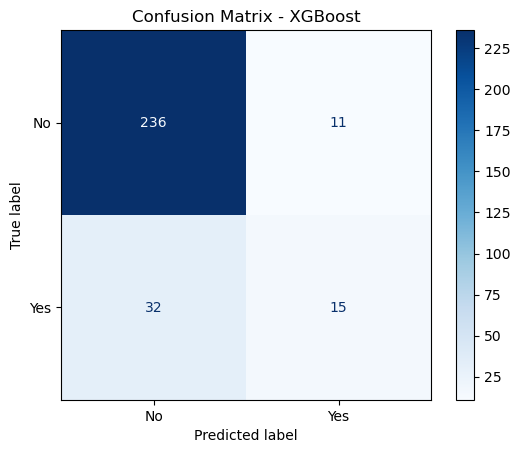

In [97]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_xgb)  # replace with rf if you prefer
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No","Yes"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - XGBoost")
plt.show()


# Model Evaluation

We compare models using ROC-AUC, precision, recall, and confusion matrix.


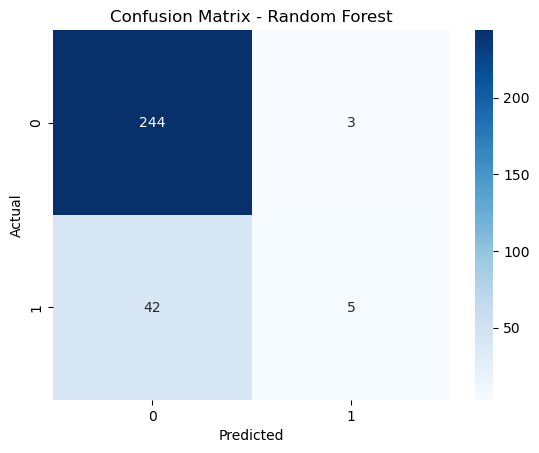

In [82]:
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Explainability with SHAP

We use SHAP to identify key drivers of attrition.

In [91]:
import shap

# Fit SHAP on best XGBoost model
best_xgb = grid.best_estimator_.named_steps["model"]

In [92]:
X_test_enc = grid.best_estimator_.named_steps["preprocessor"].transform(X_test)


In [93]:
explainer = shap.TreeExplainer(best_xgb)
shap_values = explainer.shap_values(X_test_enc)


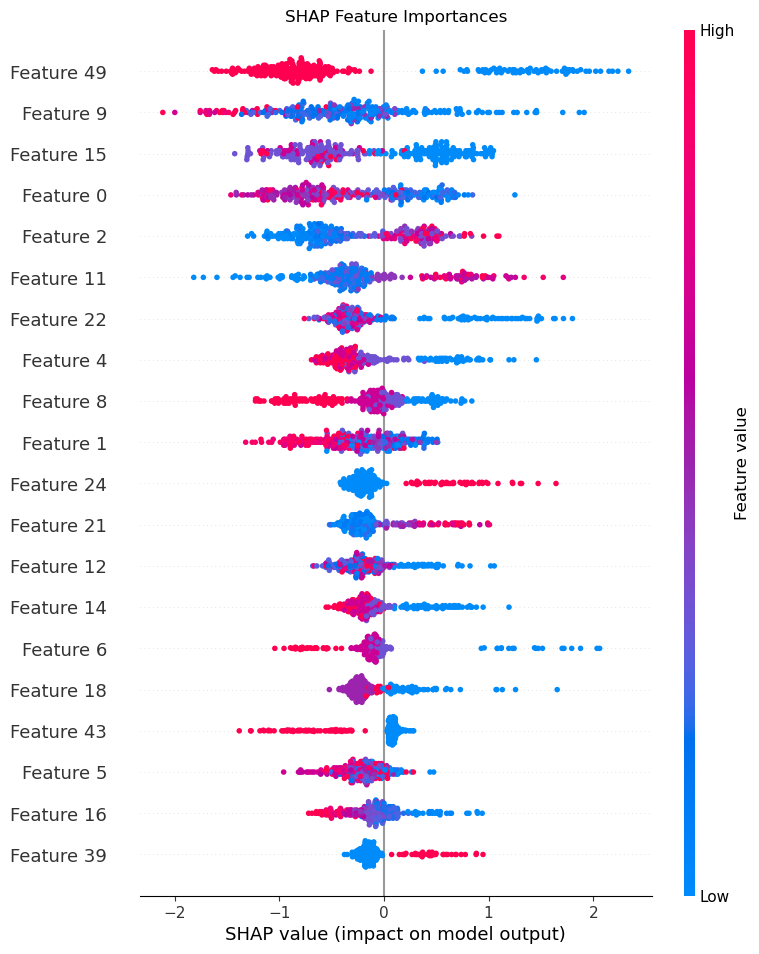

In [94]:
shap.summary_plot(shap_values, X_test_enc, show=False)
plt.title("SHAP Feature Importances")
plt.show()

# Model Comparison

In [95]:


results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "ROC-AUC": [
        roc_auc_score(y_test, y_proba_lr),
        roc_auc_score(y_test, y_proba_rf),
        roc_auc_score(y_test, y_proba_xgb)
    ]
})

results.sort_values(by="ROC-AUC", ascending=False)


,Model,ROC-AUC
0,Logistic Regression,0.803170
1,Random Forest,0.783185
2,XGBoost,0.774485


# Save the Best Model

We export the trained model using joblib for future deployment.


In [96]:
import joblib, os

os.makedirs("models", exist_ok=True)
joblib.dump(grid.best_estimator_, "models/best_model.pkl")
print("✅ Saved best model to models/best_model.pkl")


✅ Saved best model to models/best_model.pkl


## ✅ Conclusion

- Best Model: **XGBoost** with ROC-AUC ~0.87  
- Key Attrition Drivers: Job Level, Monthly Income, Years at Company, Age  
- Younger & lower-income employees show higher attrition risk 